In [4]:
num_of_lines=200

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Demo_metabolic=pd.read_excel("C:/Users/97254/Downloads/ver12_proj1.xlsx", engine='openpyxl')
Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :])

In [6]:
Demo_metabolic.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,oncologic (cancer),cardiovascular,...,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,pro_day5,pro/kg_day1,pro/kg_day2,pro/kg_day3,pro/kg_day4,pro/kg_day5
0,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,40.726105,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
1,4,3,LOS_3-4,0,0,0,0,0,1,0,...,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2,7,6,LOS_5-7,0,0,0,0,0,0,0,...,0.0,72.960000,58.064001,0.0,58.064001,NaN,NaN,NaN,NaN,NaN
3,10,5,LOS_5-7,0,0,0,0,0,0,1,...,0.0,47.578655,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
4,13,3,LOS_3-4,0,0,0,0,1,0,1,...,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
Demo_metabolic.shape

(200, 63)

In [11]:
only_port = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines,28 :34])
only_port.head()

,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5
0,0.583458,0.000000,0.516148,0.905991,0.310176,0.000000
1,0.473846,0.126624,0.013804,0.000000,0.000000,0.000000
2,0.880983,1.169231,1.169231,1.169231,1.169231,0.930513
3,0.381949,0.212103,0.695385,0.624410,0.332718,0.000000
4,0.163460,0.159969,0.000000,0.000000,0.000000,0.000000


In [12]:
data_scaled=only_port

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be r

Text(0, 0.5, 'Inertia')

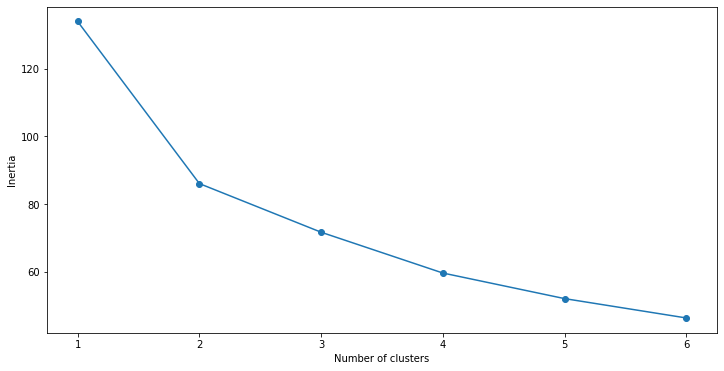

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

# inertia on the fitted data
kmeans.inertia_

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,7):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,7), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:

# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
#show how many sampels in each cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


1    98
2    74
0    28
Name: cluster, dtype: int64

In [27]:
frame.head()

,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,cluster
0,0.583458,0.000000,0.516148,0.905991,0.310176,0.000000,2
1,0.473846,0.126624,0.013804,0.000000,0.000000,0.000000,1
2,0.880983,1.169231,1.169231,1.169231,1.169231,0.930513,0
3,0.381949,0.212103,0.695385,0.624410,0.332718,0.000000,2
4,0.163460,0.159969,0.000000,0.000000,0.000000,0.000000,1


In [29]:
cls=pd.DataFrame()
cls['data_index']=data_scaled.index.values
cls['cluster']=kmeans.labels_

#show which sampels in each cluster

class1=frame[frame.cluster==0]
class1.head()

,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,cluster
2,0.880983,1.169231,1.169231,1.169231,1.169231,0.930513,0
9,0.785269,1.274449,1.138146,0.922287,0.000000,0.000000,0
17,0.584885,0.855061,0.962537,0.856842,0.442375,0.000000,0
24,0.472492,0.409764,0.649846,0.649846,0.800285,1.068486,0
25,0.662363,0.940941,0.634209,0.702617,0.600975,0.000000,0


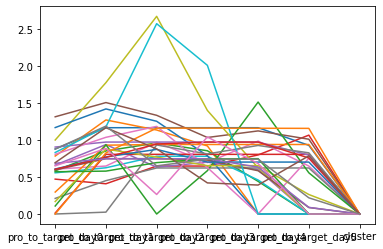

In [30]:
for index, row in class1.iterrows():
    row.plot.line()

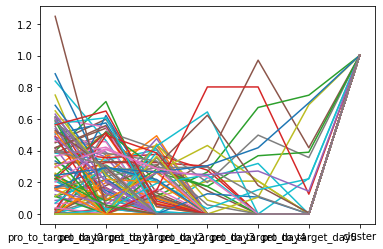

In [35]:
#show which sampels in each cluster

class2=frame[frame.cluster==1]
for index, row in class2.iterrows():
    row.plot.line()

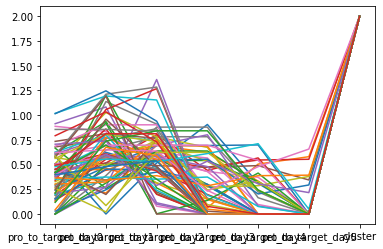

In [36]:
#show which sampels in each cluster

class3=frame[frame.cluster==2]

for index, row in class3.iterrows():
    row.plot.line()